<a href="https://colab.research.google.com/github/harshinitata20/Machine-Learning-Projects/blob/main/4)Wine_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Dataset/WineQT.csv')
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
set(dataframe['quality'])

{3, 4, 5, 6, 7, 8}

In [ ]:
dataframe.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
dataframe.shape

(1143, 13)

In [ ]:
dataframe.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
dataframe.duplicated().sum()

np.int64(0)

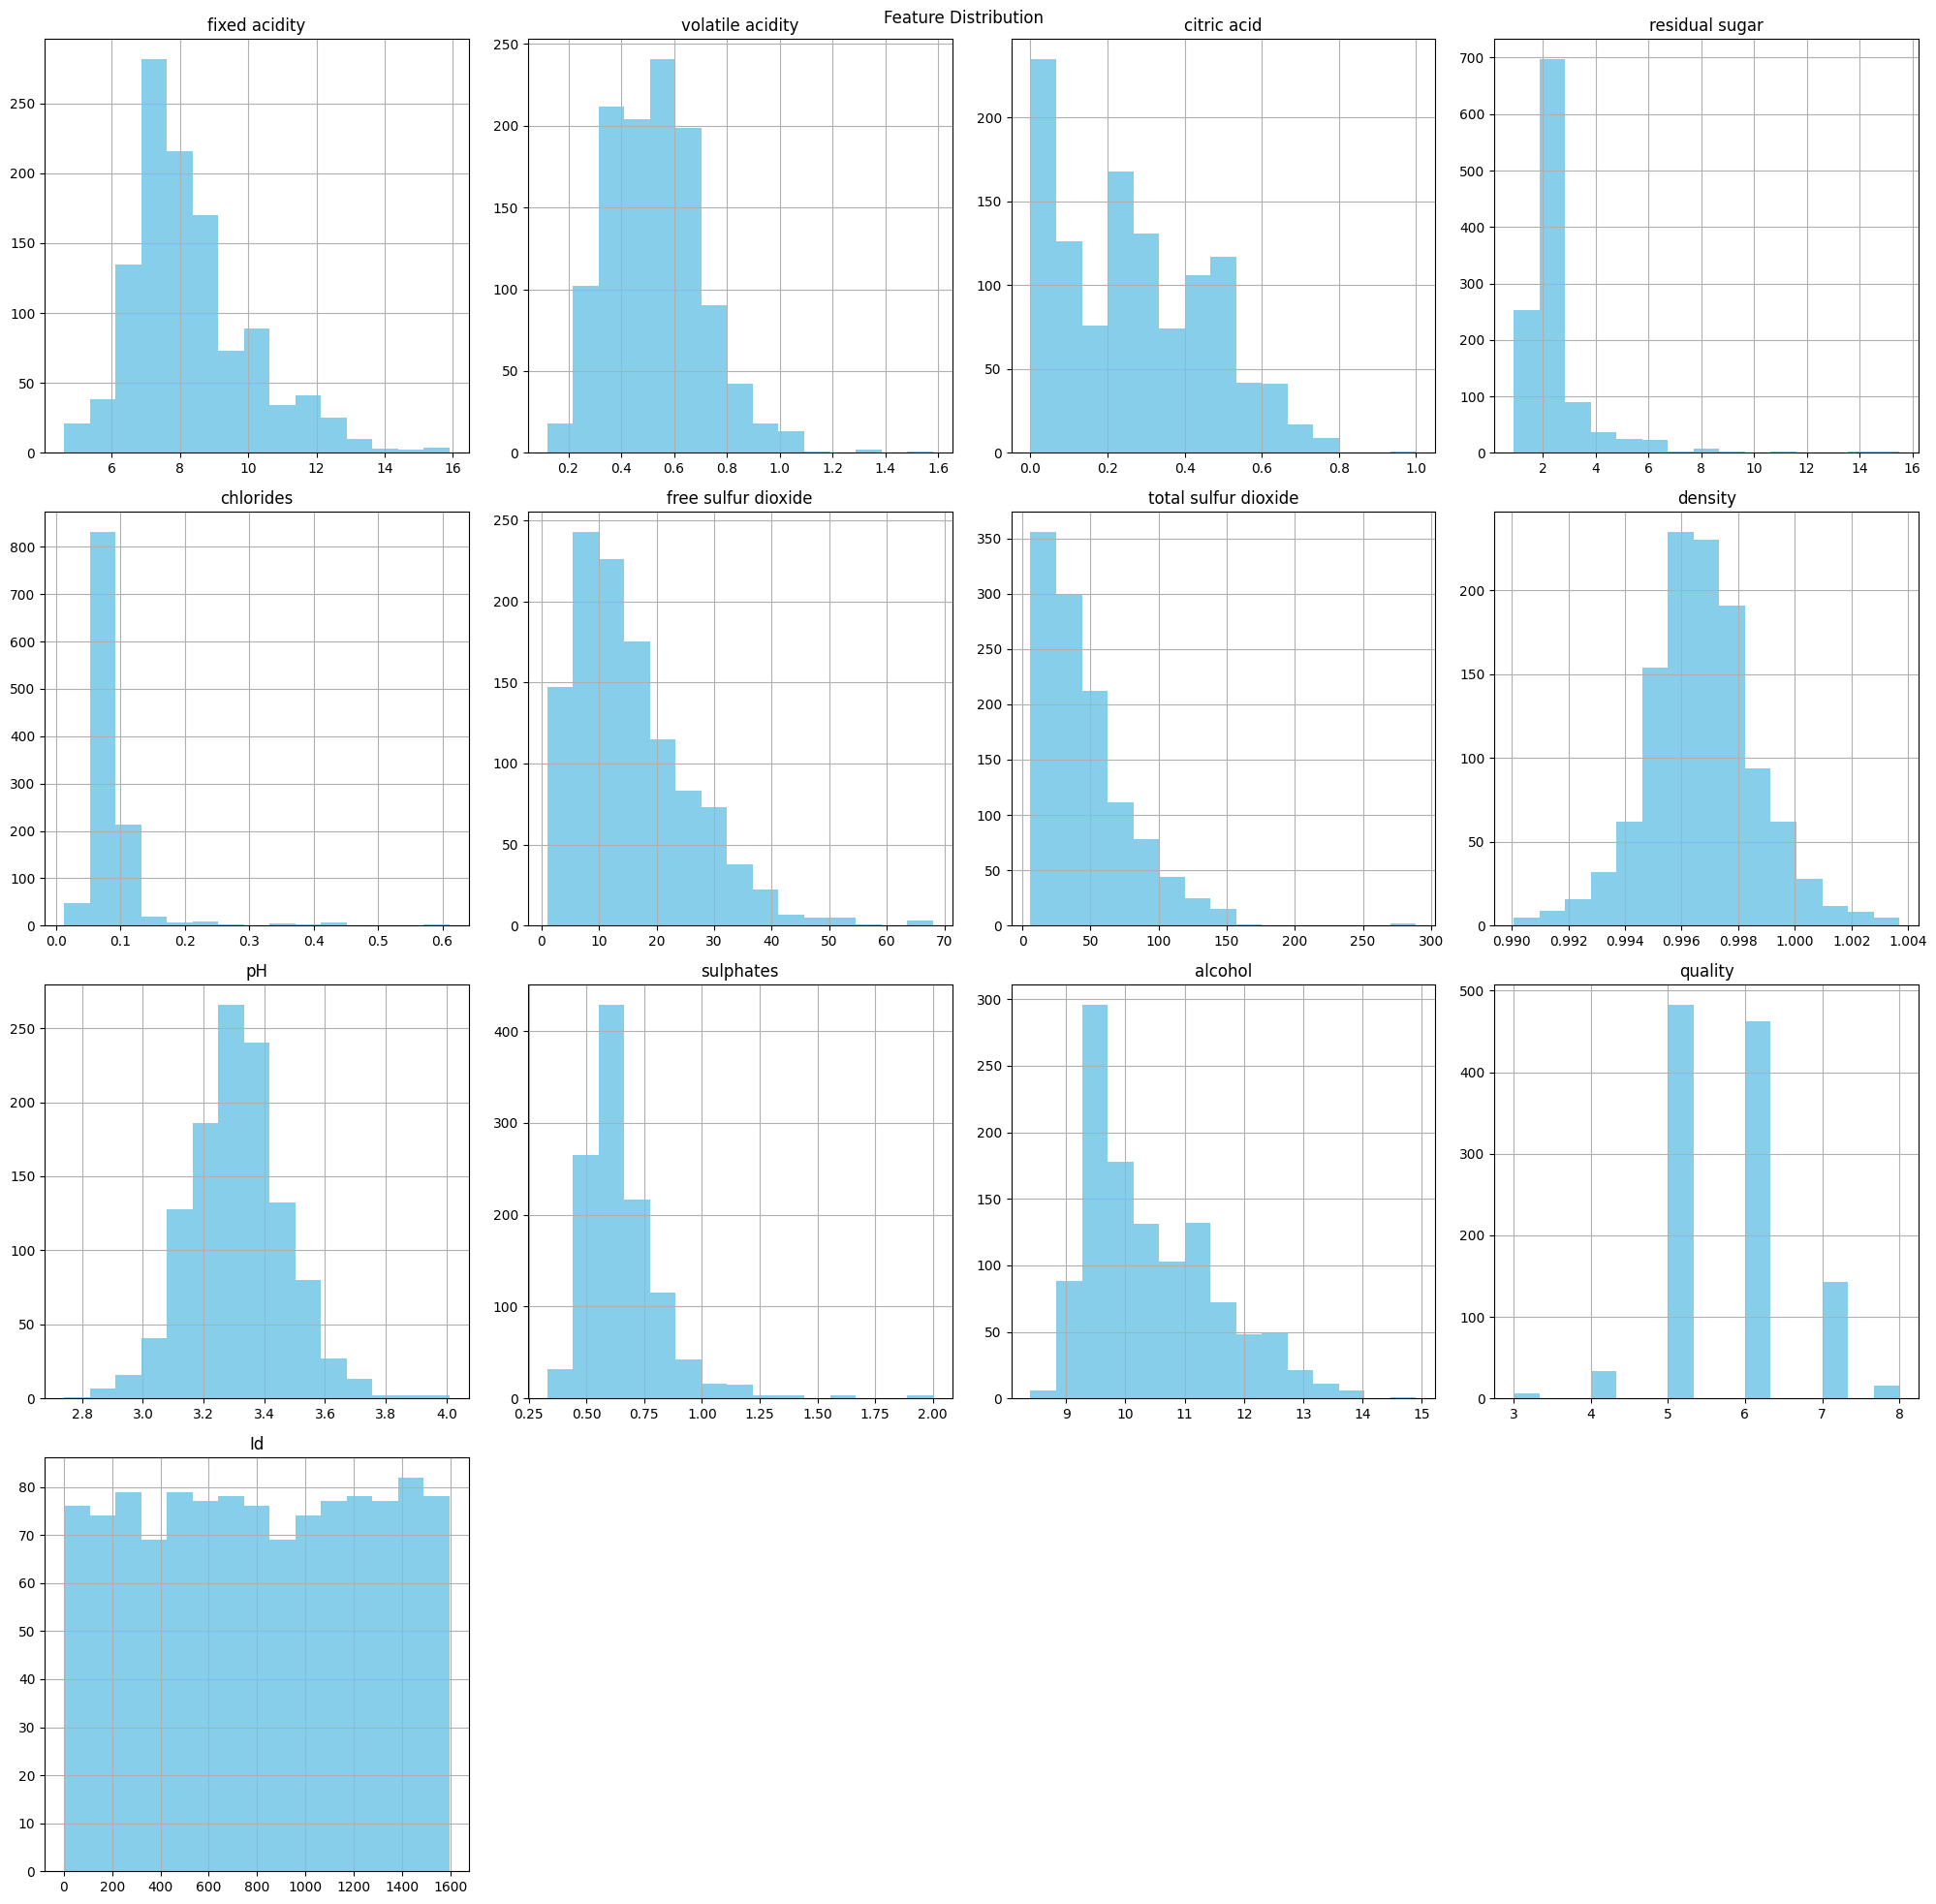

In [ ]:
dataframe.hist(bins=15, figsize=(20,20), layout =(4,4), color = 'skyblue')
plt.suptitle('Feature Distribution')
plt.tight_layout()
plt.show()

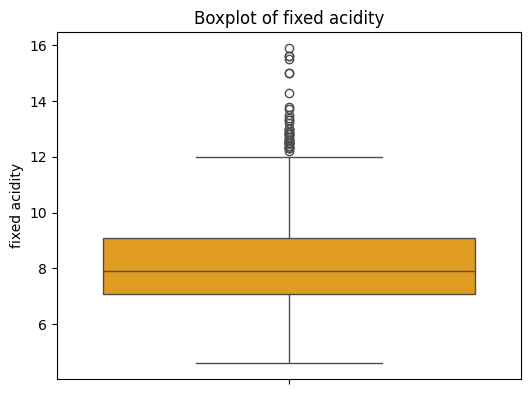

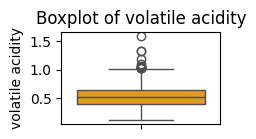

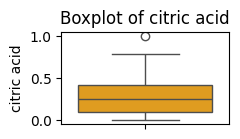

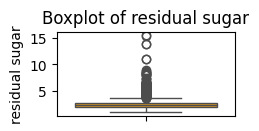

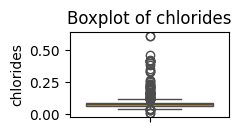

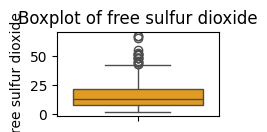

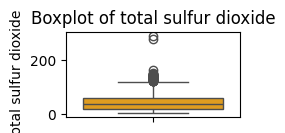

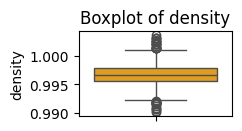

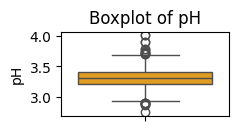

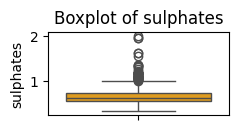

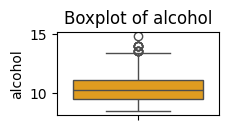

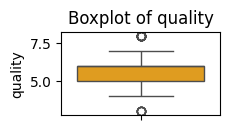

In [ ]:
plt.figure(figsize=(15,15))
for i, col in enumerate(dataframe.columns[:-1]):
  plt.subplot(4,3,i+1)
  sns.boxplot(y=dataframe[col], color ='orange')
  plt.title(f'Boxplot of {col}')
  plt.tight_layout()
  plt.show()

/tmp/ipython-input-14-1929313452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data= dataframe, palette='coolwarm')


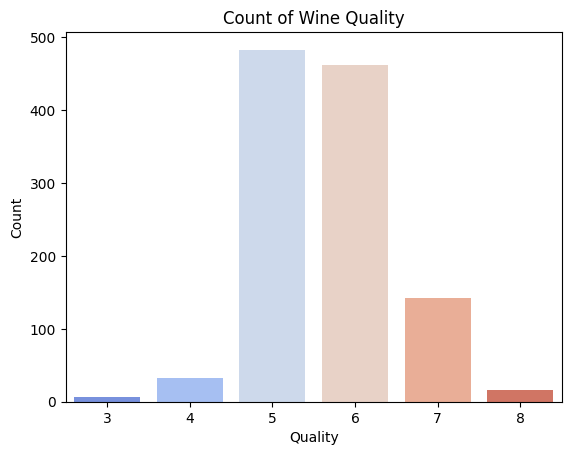

In [ ]:
sns.countplot(x='quality', data= dataframe, palette='coolwarm')
plt.title('Count of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

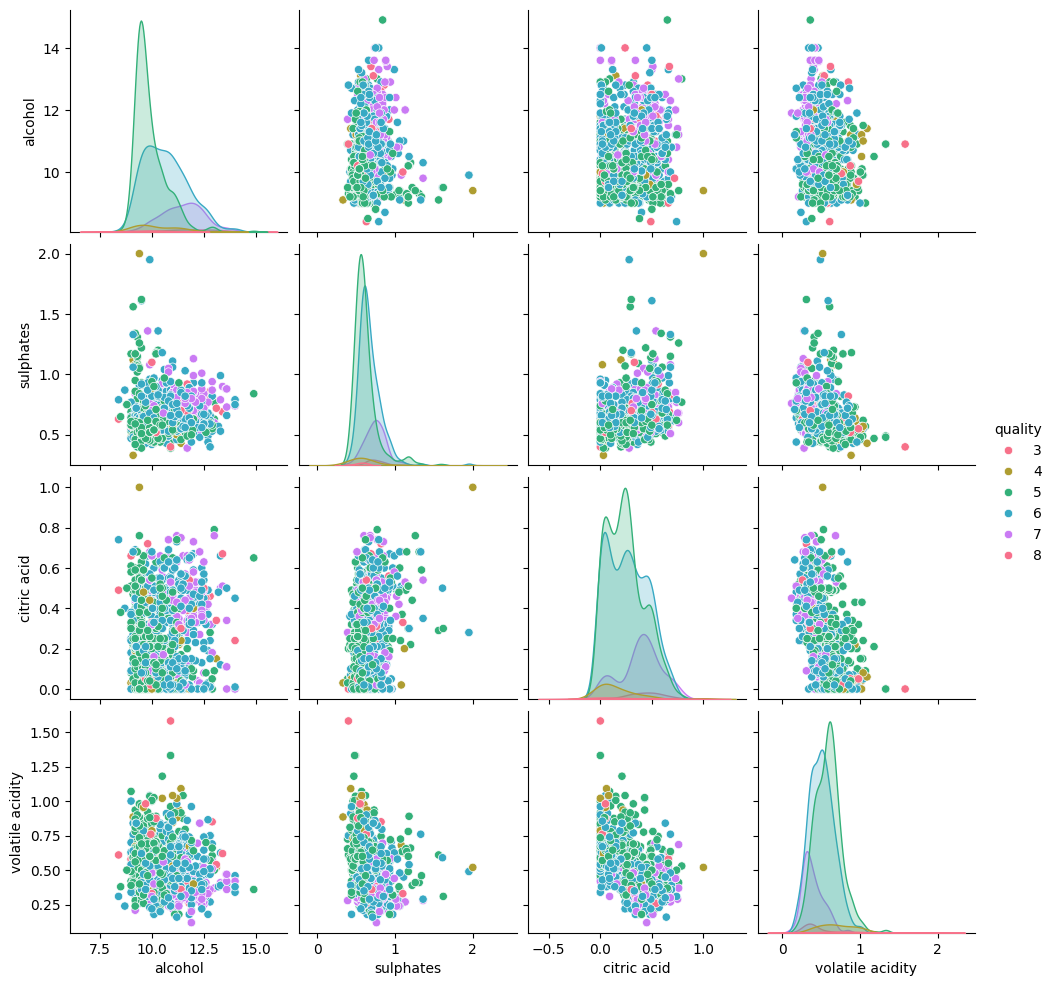

In [ ]:

key_features = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'quality']
sns.pairplot(dataframe[key_features], hue='quality', palette='husl', diag_kind='kde')
plt.show()


/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


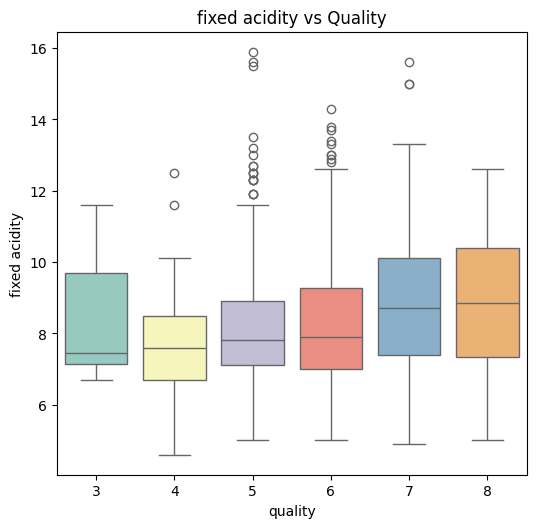

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


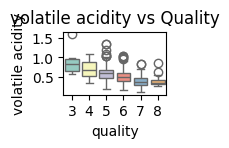

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


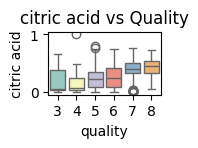

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


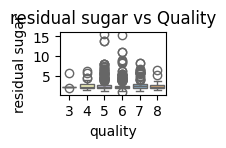

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


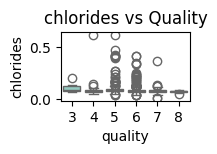

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


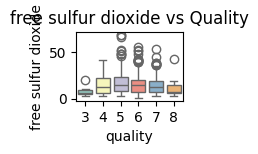

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


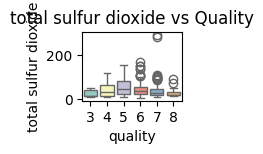

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


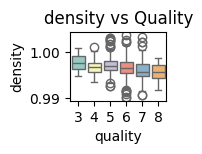

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


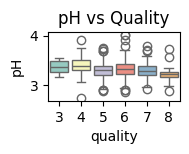

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


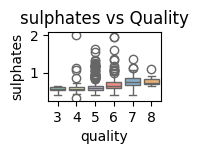

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


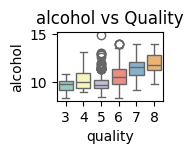

/tmp/ipython-input-16-1655169740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')


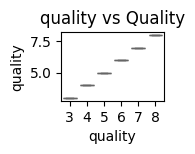

In [ ]:
features = dataframe.columns[:-1]
plt.figure(figsize=(20,20))
for i, col in enumerate(features):
  plt.subplot(4,4,i+1)
  sns.boxplot(x='quality', y=col, data=dataframe, palette='Set3')
  plt.title(f'{col} vs Quality')
  plt.tight_layout()
  plt.show()

In [ ]:
def remove_outliers(dataframe, column):
  Q1= dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  return dataframe[(dataframe[column]>=lower_bound)& (dataframe[column]<=upper_bound)]

dataframe_clean = dataframe.copy()
for col in dataframe.columns[:-1]:
  dataframe_clean = remove_outliers(dataframe_clean, col)

print('Shape after removal of outliers:', dataframe_clean.shape)

Shape after removal of outliers: (787, 13)


quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


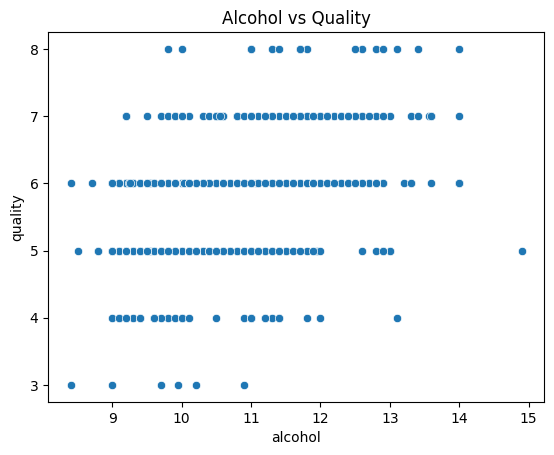

In [ ]:

print(dataframe.corr()['quality'].sort_values(ascending=False))


sns.scatterplot(x='alcohol', y='quality', data=dataframe)
plt.title("Alcohol vs Quality")
plt.show()


In [ ]:
X = dataframe.drop('quality', axis=1)
y = dataframe['quality']

In [ ]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([5, 6, 5, 5, 5, 7, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 7, 5, 7, 7, 6,
       5, 6, 5, 6, 7, 7, 6, 6, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 4,
       5, 5, 6, 5, 5, 7, 6, 5, 5, 7, 6, 7, 5, 7, 6, 5, 5, 6, 7, 7, 8, 6,
       6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 4, 5,
       7, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 7, 6, 7,
       7, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 4, 6, 5, 6, 5, 5,
       7, 7, 5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,
       6, 6, 6, 5, 6, 5, 7, 6, 5, 5, 7, 5, 6, 7, 6, 6, 7, 5, 6, 6, 5, 6,
       7, 6, 5, 6, 5, 5, 7, 7, 5, 6, 7, 6, 6, 7, 4, 6, 5, 6, 6, 5, 7, 6,
       4, 5, 5, 4, 6, 7, 5, 6, 6, 6, 7, 8, 5, 5, 6, 6, 5, 5, 6, 6, 8, 6,
       7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 4, 7, 5, 5, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 6, 7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 7])

[Text(0.5085302561837456, 0.9666666666666667, 'x[10] <= 10.35\ngini = 0.646\nsamples = 857\nvalue = [6.0, 26.0, 362.0, 341.0, 109.0, 13.0]'),
 Text(0.2493558598351001, 0.9, 'x[9] <= 0.585\ngini = 0.534\nsamples = 469\nvalue = [5, 16, 283, 148, 15, 2]'),
 Text(0.37894305800942285, 0.9333333333333333, 'True  '),
 Text(0.08664605418138988, 0.8333333333333334, 'x[4] <= 0.069\ngini = 0.417\nsamples = 218\nvalue = [3, 8, 160, 45, 2, 0]'),
 Text(0.023557126030624265, 0.7666666666666667, 'x[0] <= 7.45\ngini = 0.616\nsamples = 23\nvalue = [1, 1, 10, 10, 1, 0]'),
 Text(0.009422850412249705, 0.7, 'x[0] <= 7.2\ngini = 0.48\nsamples = 10\nvalue = [1, 1, 7, 0, 1, 0]'),
 Text(0.004711425206124852, 0.6333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0, 0, 0]'),
 Text(0.014134275618374558, 0.6333333333333333, 'x[3] <= 1.6\ngini = 0.75\nsamples = 4\nvalue = [1, 1, 1, 0, 1, 0]'),
 Text(0.009422850412249705, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.01

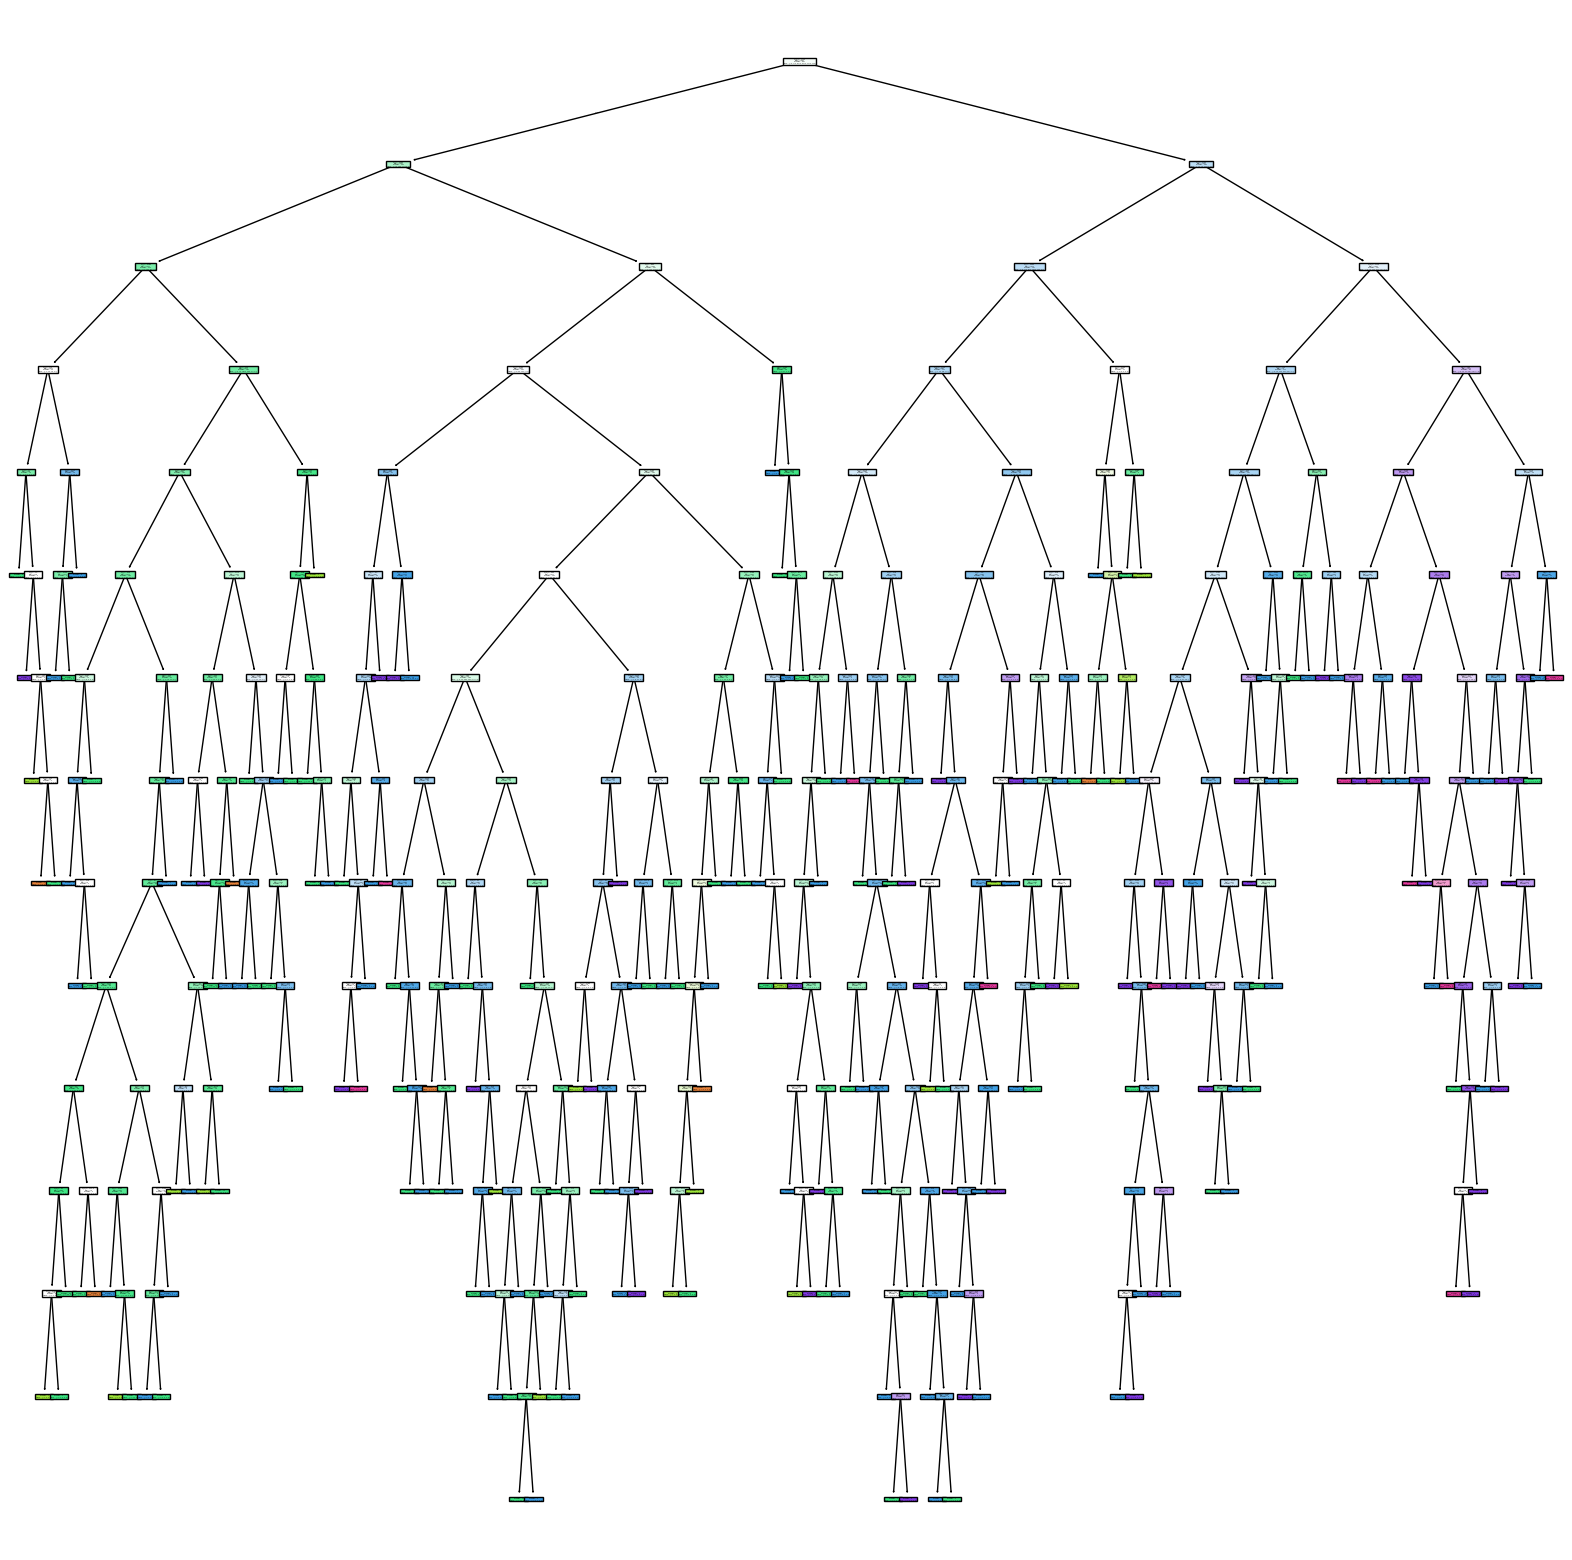

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True)

In [ ]:
sampleData = dataframe.head(20)
sampleData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [ ]:
X_sample = sampleData.drop(columns= 'quality', axis=1)
y_sample = sampleData['quality']

In [ ]:
sampleModel = DecisionTreeClassifier()
sampleModel.fit(X_sample, y_sample)

DecisionTreeClassifier()

In [ ]:
sampleData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
X_sample.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

[Text(0.375, 0.9, 'x[1] <= 0.355\ngini = 0.465\nsamples = 20\nvalue = [14, 3, 3]'),
 Text(0.16666666666666666, 0.7, 'x[8] <= 3.23\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.2708333333333333, 0.8, 'True  '),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5833333333333334, 0.7, 'x[6] <= 22.0\ngini = 0.304\nsamples = 17\nvalue = [14, 1, 2]'),
 Text(0.4791666666666667, 0.8, '  False'),
 Text(0.4166666666666667, 0.5, 'x[5] <= 6.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'x[3] <= 2.35\ngini = 0.133\nsamples = 14\nvalue = [13, 1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.8333333333333334, 0.3, 'x[1] <= 0.64\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.7

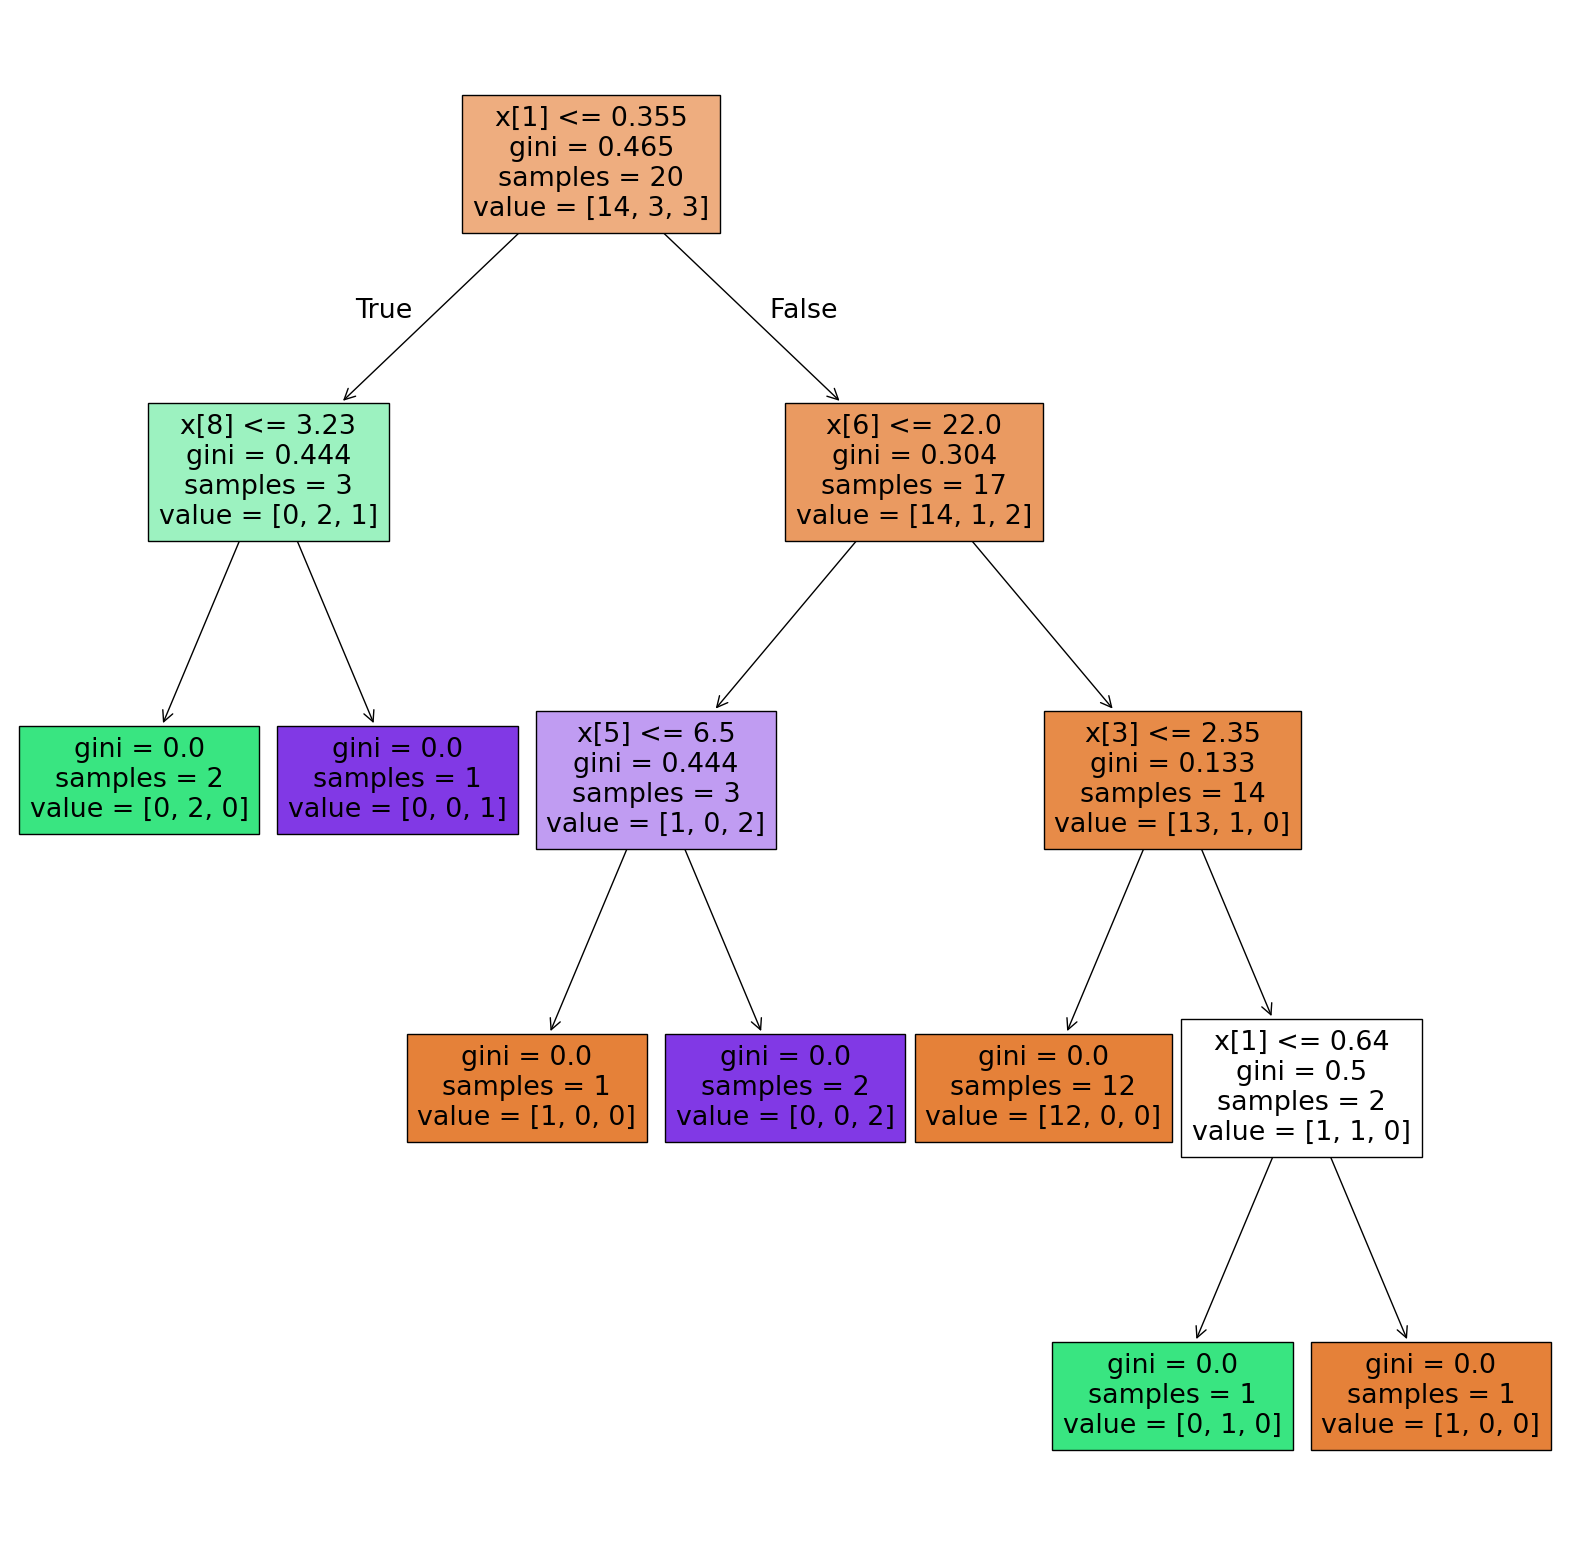

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(sampleModel, filled= True)

In [ ]:
set(sampleData.quality)

{5, 6, 7}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.69      0.70      0.70       120
           6       0.54      0.57      0.55       114
           7       0.59      0.48      0.53        42
           8       0.33      0.33      0.33         3

    accuracy                           0.59       286
   macro avg       0.43      0.42      0.42       286
weighted avg       0.60      0.59      0.59       286



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test, y_test)

0.6783216783216783

In [ ]:
y_predict_rf = rf.predict(X_test)
print(y_predict_rf)

[5 6 5 5 5 6 5 5 5 5 7 6 6 6 5 5 6 6 5 7 6 6 5 7 5 5 7 6 5 6 5 5 7 6 5 5 6
 6 6 5 7 6 6 5 5 5 5 6 5 6 7 5 6 7 6 7 6 6 6 5 5 6 6 7 6 6 6 5 5 6 6 6 5 6
 6 5 5 6 5 6 5 6 6 5 5 6 5 5 6 6 5 6 5 5 5 5 5 6 5 5 6 7 5 6 5 5 6 6 6 7 7
 5 5 6 5 6 6 6 6 5 5 5 5 6 5 5 6 6 5 6 5 5 7 6 7 5 5 5 6 6 7 6 6 5 6 5 5 5
 5 5 6 5 6 5 6 5 5 5 7 6 5 5 6 6 7 5 6 6 6 5 6 5 6 5 5 5 6 6 6 5 6 5 6 5 5
 5 7 5 6 6 6 6 7 6 6 6 5 6 7 6 6 6 5 6 7 7 5 5 6 6 5 6 6 6 5 6 6 5 7 5 6 5
 5 5 5 6 6 6 6 6 7 7 5 5 6 7 5 6 5 5 6 6 6 5 5 6 5 5 6 5 5 5 6 6 5 6 6 5 5
 5 5 6 7 6 5 5 6 6 5 6 6 7 5 6 5 6 5 6 5 5 5 6 5 5 5 7]


In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=530219515),
 DecisionTreeClassifier(max_features='sqrt', random_state=765052116),
 DecisionTreeClassifier(max_features='sqrt', random_state=943194556),
 DecisionTreeClassifier(max_features='sqrt', random_state=79691597),
 DecisionTreeClassifier(max_features='sqrt', random_state=1743973181),
 DecisionTreeClassifier(max_features='sqrt', random_state=1377140603),
 DecisionTreeClassifier(max_features='sqrt', random_state=1191133225),
 DecisionTreeClassifier(max_features='sqrt', random_state=1526667011),
 DecisionTreeClassifier(max_features='sqrt', random_state=1189035396),
 DecisionTreeClassifier(max_features='sqrt', random_state=10346857),
 DecisionTreeClassifier(max_features='sqrt', random_state=2078671242),
 DecisionTreeClassifier(max_features='sqrt', random_state=456489640),
 DecisionTreeClassifier(max_features='sqrt', random_state=1583955172),
 DecisionTreeClassifier(max_features='sqrt', random_state=61735633),
 DecisionTreeCla

[Text(0.49053560323383083, 0.9666666666666667, 'x[10] <= 9.925\ngini = 0.638\nsamples = 548\nvalue = [5, 28, 373, 340, 101, 10]'),
 Text(0.23460820895522388, 0.9, 'x[5] <= 18.5\ngini = 0.49\nsamples = 232\nvalue = [4.0, 13.0, 239.0, 99.0, 7.0, 1.0]'),
 Text(0.3625719060945274, 0.9333333333333333, 'True  '),
 Text(0.17692786069651742, 0.8333333333333334, 'x[1] <= 0.605\ngini = 0.551\nsamples = 151\nvalue = [4, 6, 128, 83, 6, 1]'),
 Text(0.11131840796019901, 0.7666666666666667, 'x[0] <= 8.55\ngini = 0.567\nsamples = 90\nvalue = [1, 2, 66, 64, 6, 1]'),
 Text(0.060945273631840796, 0.7, 'x[11] <= 136.5\ngini = 0.565\nsamples = 57\nvalue = [0, 2, 35, 50, 6, 0]'),
 Text(0.022388059701492536, 0.6333333333333333, 'x[7] <= 0.997\ngini = 0.499\nsamples = 16\nvalue = [0, 0, 18, 5, 4, 0]'),
 Text(0.009950248756218905, 0.5666666666666667, 'x[7] <= 0.996\ngini = 0.208\nsamples = 10\nvalue = [0, 0, 15, 2, 0, 0]'),
 Text(0.004975124378109453, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),

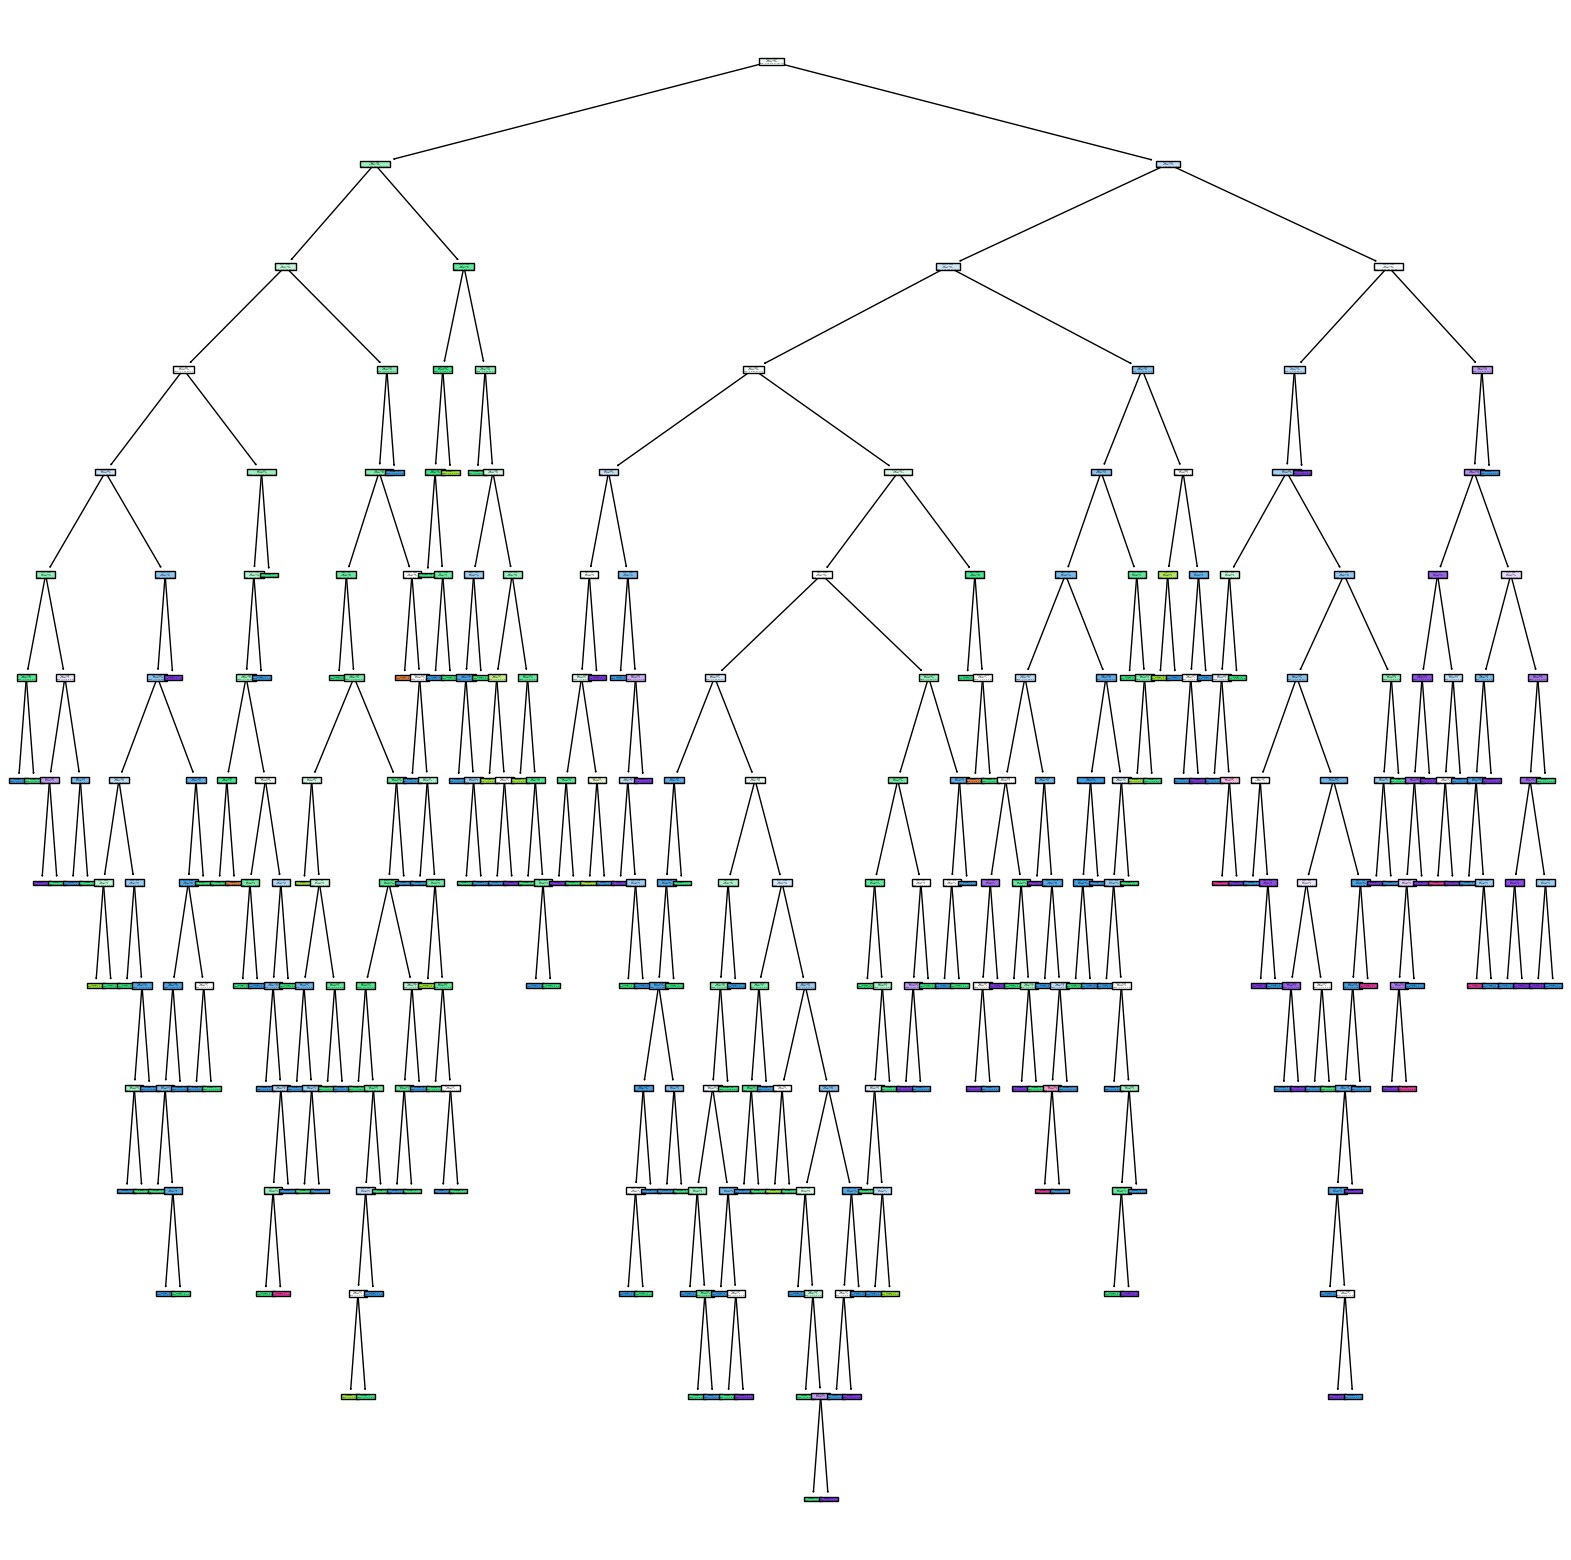

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0], filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test, y_test)

0.6678321678321678

HYPERPARAMETER Tuning

In [ ]:
grid_param = {
    'n_estimators': [50, 100, 120],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5),

}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(param_grid= grid_param, cv=10, n_jobs=6, verbose=1, estimator=rf)
grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 5),
                         'n_estimators': [50, 100, 120]},
             verbose=1)

In [ ]:
grid_search_rf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}

In [ ]:
rf_new = RandomForestClassifier(n_estimators=120, criterion='gini', max_depth=4)
rf_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=120)

In [ ]:
rf_new.score(X_test, y_test)

0.6188811188811189